In [4]:
# Libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import ranking
import helper
import preprocess

In [5]:
pop_word_count = 3
groups, ranks, scores, mapping = ranking.main()
reverse_mapping = preprocess.get_reverse_mapping(mapping)
group_pop_words = []
for group in groups:
    group = np.array(group)
    #print(group.shape)
    word_count = np.count_nonzero(group, axis=0)
    pop_indices = word_count[np.argsort(word_count)[-pop_word_count:]]
    pop_words = [reverse_mapping[pop_idx] for pop_idx in pop_indices]
    group_pop_words.append(pop_words)
    #for pop_word in pop_words:
    #    print(pop_word, end=',')
    #print()
group_names = [" ".join(pop_words) for pop_words in group_pop_words]

BernoulliNB
Fitting....
Done Fitting.....
Group scores:  [(0.6460206339961956, 6), (0.6005230348824708, 7), (0.5464382468358692, 8), (0.5181876481603976, 3), (0.4909822109908292, 10), (0.48829243460674676, 5), (0.486467888306504, 1), (0.4655202759348057, 9), (0.46146498252347945, 4), (0.42728506442804726, 2)]
Scores:  [0.48646789 0.42728506 0.51818765 0.46146498 0.48829243 0.64602063
 0.60052303 0.54643825 0.46552028 0.49098221]
Rankings:  [ 7. 10.  4.  9.  6.  1.  2.  3.  8.  5.]


[ 7. 10.  4.  9.  6.  1.  2.  3.  8.  5.]
[0.48646789 0.42728506 0.51818765 0.46146498 0.48829243 0.64602063
 0.60052303 0.54643825 0.46552028 0.49098221]


<IPython.core.display.Javascript object>


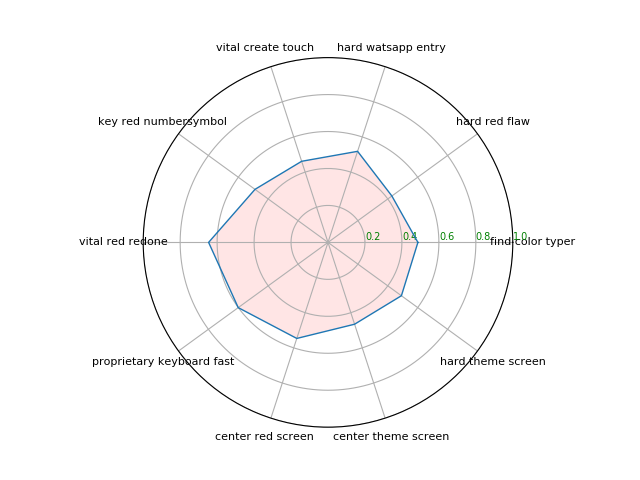

In [12]:
# number of variable
categories=group_names
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
# values += values[:1]
values = np.append(scores, scores[0])
print(ranks)
print(scores)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2","0.4","0.6", "0.8", "1.0"], color="green", size=7)
plt.ylim(0,1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'r', alpha=0.1)

plt.show()